(24, 24, 4)
<class 'numpy.ndarray'>


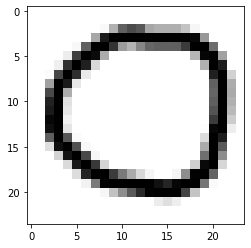

In [1]:
import matplotlib.pyplot as plt
c0 = plt.imread('data/handwriting/handwriting_shape/train/circle/circle001.png')
plt.imshow(c0)
print(c0.shape)
print(type(c0))

In [26]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D # 필터링
from tensorflow.keras.layers import MaxPool2D # 풀링
from tensorflow.keras.layers import Flatten # 2차원 영상 데이터를 1차원으로
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
np.random.seed(3)

In [5]:
# 1 .데이터 생성하기
train_datagen = ImageDataGenerator(rescale=1./255) # 정규화 작업
train_generator = train_datagen.flow_from_directory('data/handwriting/hard_handwriting_shape/train',
                                                   target_size=(24,24),
                                                   batch_size=3,
                                                   class_mode='categorical')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('data/handwriting/hard_handwriting_shape/test',
                                                 target_size=(24,24),
                                                 batch_size=3,
                                                 class_mode='categorical')

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [8]:
# 2. 모델 구성하기
model = Sequential()
# 컨볼루션 필터 설정
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(24,24,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu')) # 윗 단계 input받아서 처리하니까 아래부턴 쓸 필요없다.
# 풀링
model.add(MaxPool2D(pool_size=(2,2))) # 2 by 2에서 큰 값만 뽑아 이미지 축소
# 2차원 이미지 1차원으로 변환
model.add(Flatten())
# DNN
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 22, 22, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               819328    
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 387       
Total params: 839,107
Trainable params: 839,107
Non-trainable params: 0
________________________________________________

In [12]:
# 3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# 4. 학습
hist = model.fit_generator(train_generator,steps_per_epoch=15,epochs=50,validation_data=test_generator,verbose=2,validation_steps=5)


Epoch 1/50
15/15 - 1s - loss: 0.9396 - accuracy: 0.7556 - val_loss: 1.3947 - val_accuracy: 0.3333
Epoch 2/50
15/15 - 0s - loss: 0.1561 - accuracy: 0.9778 - val_loss: 2.4034 - val_accuracy: 0.3333
Epoch 3/50
15/15 - 0s - loss: 0.0172 - accuracy: 1.0000 - val_loss: 3.4618 - val_accuracy: 0.4000
Epoch 4/50
15/15 - 0s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 3.8087 - val_accuracy: 0.4000
Epoch 5/50
15/15 - 0s - loss: 4.9321e-04 - accuracy: 1.0000 - val_loss: 4.1216 - val_accuracy: 0.4000
Epoch 6/50
15/15 - 0s - loss: 2.7722e-04 - accuracy: 1.0000 - val_loss: 4.2972 - val_accuracy: 0.3333
Epoch 7/50
15/15 - 0s - loss: 2.2870e-04 - accuracy: 1.0000 - val_loss: 4.4001 - val_accuracy: 0.3333
Epoch 8/50
15/15 - 0s - loss: 1.8940e-04 - accuracy: 1.0000 - val_loss: 4.4898 - val_accuracy: 0.3333
Epoch 9/50
15/15 - 0s - loss: 1.6490e-04 - accuracy: 1.0000 - val_loss: 4.5683 - val_accuracy: 0.3333
Epoch 10/50
15/15 - 0s - loss: 1.4095e-04 - accuracy: 1.0000 - val_loss: 4.6494 - val_accuracy: 0.

In [13]:
# 5. 모델 평가하기
score = model.evaluate_generator(test_generator)
print('loss 값 :',score[0])
print('accuracy 값 :',score[1])

loss 값 : 5.944570064544678
accuracy 값 : 0.3333333432674408


D:\kks\IDE\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [20]:
# 6.예측하기
pred = model.predict_generator(test_generator)
print(test_generator.class_indices)
print(np.argmax(pred,axis=1))

{'circle': 0, 'rectangle': 1, 'triangle': 2}
[2 2 2 2 2 2 0 2 2 2 2 2 2 2 2]


# accuracy 늘리기
<ul>
    <li> 데이터 확보 , 데이터 부풀리기(ImageDataGenerator)</li>
    <li> 레이어 층 확보 </li>

In [44]:
# 1 .데이터 생성하기
train_datagen = ImageDataGenerator(rescale=1./255,
rotation_range=10,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.7, #0.7라이안 밀림
zoom_range=[0.9,2.2], # 0.9배~2.2배
horizontal_flip=True, # 수평방향으로 뒤집기
vertical_flip=True, # 수직방향으로 뒤집기
fill_mode='nearest')#이미지를 회전,
#이동하거나 축소할 때 공간을 채우는 방식

train_generator = train_datagen.flow_from_directory('data/handwriting/hand_test/train',
                                                   target_size=(24,24),
                                                   batch_size=3,
                                                   class_mode='categorical')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('data/handwriting/hand_test/test',
                                                 target_size=(24,24),
                                                 batch_size=3,
                                                 class_mode='categorical')
# 2. 모델 구성하기
model = Sequential()
# 컨볼루션 필터 설정
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(24,24,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu')) # 윗 단계 input받아서 처리하니까 아래부턴 쓸 필요없다.
# 풀링
model.add(MaxPool2D(pool_size=(2,2))) # 2 by 2에서 큰 값만 뽑아 이미지 축소
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.05))
# 2차원 이미지 1차원으로 변환
model.add(Flatten())
# DNN
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3,activation='softmax'))
# 3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# 4. 학습
hist = model.fit_generator(train_generator,steps_per_epoch=15,epochs=50,validation_data=test_generator,verbose=2,validation_steps=5)


Found 69 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Epoch 1/50


D:\kks\IDE\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


15/15 - 1s - loss: 1.1891 - accuracy: 0.2444 - val_loss: 1.1009 - val_accuracy: 0.4667
Epoch 2/50
15/15 - 0s - loss: 1.1062 - accuracy: 0.2667 - val_loss: 1.0971 - val_accuracy: 0.4000
Epoch 3/50
15/15 - 0s - loss: 1.1005 - accuracy: 0.2444 - val_loss: 1.0941 - val_accuracy: 0.3333
Epoch 4/50
15/15 - 0s - loss: 1.0927 - accuracy: 0.3111 - val_loss: 1.0778 - val_accuracy: 0.3333
Epoch 5/50
15/15 - 0s - loss: 1.0468 - accuracy: 0.4444 - val_loss: 0.9899 - val_accuracy: 0.5333
Epoch 6/50
15/15 - 0s - loss: 0.9492 - accuracy: 0.5778 - val_loss: 0.9071 - val_accuracy: 0.7333
Epoch 7/50
15/15 - 0s - loss: 1.0465 - accuracy: 0.4000 - val_loss: 1.1909 - val_accuracy: 0.3333
Epoch 8/50
15/15 - 0s - loss: 0.9335 - accuracy: 0.4222 - val_loss: 0.9016 - val_accuracy: 0.6000
Epoch 9/50
15/15 - 0s - loss: 0.8184 - accuracy: 0.7333 - val_loss: 1.1886 - val_accuracy: 0.4667
Epoch 10/50
15/15 - 0s - loss: 0.7905 - accuracy: 0.5111 - val_loss: 1.2709 - val_accuracy: 0.4667
Epoch 11/50
15/15 - 0s - loss:

In [36]:
# 5. 모델 평가하기
score = model.evaluate_generator(test_generator)
print('loss 값 :',score[0])
print('accuracy 값 :',score[1])
# 6.예측하기
pred = model.predict_generator(test_generator)
print(test_generator.class_indices)
print(np.argmax(pred,axis=1))

loss 값 : 1.1906342506408691
accuracy 값 : 0.7333333492279053
{'circle': 0, 'rectangle': 1, 'triangle': 2}
[1 2 1 1 2 0 0 0 0 0 2 0 2 2 0]


D:\kks\IDE\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
D:\kks\IDE\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
